In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [11]:
# update if dataset given 2
DATASET_DIR = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img"
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

In [3]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='validation'
)

num_classes = train_gen.num_classes

Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [4]:
# a) Load pretrained model
base_model = MobileNetV2(input_shape=(160,160,3),include_top=False,weights='imagenet')

In [5]:
#  (b) Freeze base layers
base_model.trainable = False

In [6]:
# (c) Add classifier
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
# (d) Train classifier
model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.6970 - loss: 1.3513 - val_accuracy: 0.8540 - val_loss: 0.5555
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 139ms/step - accuracy: 0.9115 - loss: 0.3144 - val_accuracy: 0.8826 - val_loss: 0.4270
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 138ms/step - accuracy: 0.9489 - loss: 0.1708 - val_accuracy: 0.8730 - val_loss: 0.4421
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.9655 - loss: 0.1092 - val_accuracy: 0.8725 - val_loss: 0.4735
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 144ms/step - accuracy: 0.9772 - loss: 0.0735 - val_accuracy: 0.8837 - val_loss: 0.4355
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.8820 - val_loss: 0.4168
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.9800 - loss: 0.0638 - val_accuracy: 0.8770 - val_loss: 0.4830
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.9817 - loss: 0

In [9]:
# (e) Fine-tune last layers 
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.9324 - loss: 0.2297 - val_accuracy: 0.8965 - val_loss: 0.4136
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 88s 381ms/step - accuracy: 0.9643 - loss: 0.1111 - val_accuracy: 0.8988 - val_loss: 0.3895
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 126s 549ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9016 - val_loss: 0.3769
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 174s 754ms/step - accuracy: 0.9770 - loss: 0.0699 - val_accuracy: 0.9016 - val_loss: 0.3667
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 156s 680ms/step - accuracy: 0.9840 - loss: 0.0570 - val_accuracy: 0.9049 - val_loss: 0.3578


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


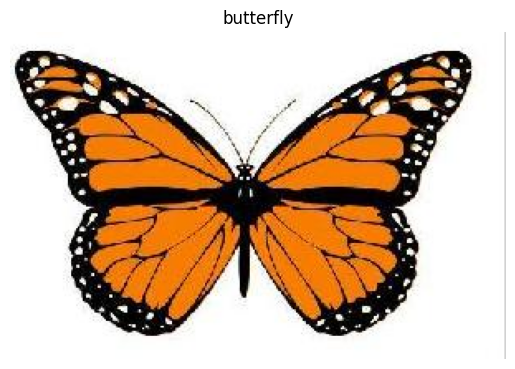

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_img(model, path):
    img = image.load_img(path, target_size=(160,160))
    arr = np.expand_dims(image.img_to_array(img)/255.0, 0)

    pred = model.predict(arr)
    cls = list(train_gen.class_indices.keys())[np.argmax(pred)]

    plt.imshow(image.load_img(path))
    plt.axis("off")
    plt.title(cls)
    plt.show()
    
predict_img(model, r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img/butterfly/image_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


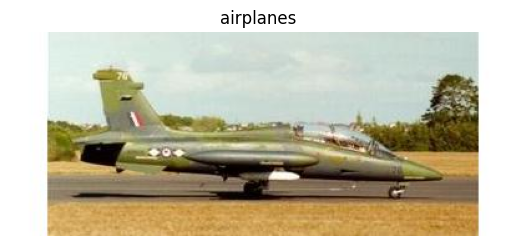

In [12]:
img_path = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img/airplanes/image_0001.jpg"
predict_img(model, img_path)

In [ ]:
# if asked use vgg16 model


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# =====================================================
# Dataset Paths and Parameters
# =====================================================
DATASET_DIR = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img"
WEIGHTS_PATH = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# =====================================================
# Data Loading + Augmentation + Preprocessing
# =====================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset="training"
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset="validation"
)

num_classes = train_gen.num_classes
print("Number of classes:", num_classes)


# =====================================================
# (a) Load Pretrained VGG16 Model (NO TOP LAYERS)
#     Load YOUR LOCAL weights file
# =====================================================
base_model = VGG16(
    input_shape=(224,224,3),
    include_top=False,
    weights=None   # Don't load ImageNet from internet
)

# Load the provided pretrained .h5 weights
base_model.load_weights(WEIGHTS_PATH)
print("Loaded local VGG16 weights successfully!")


# =====================================================
# (b) Freeze Convolutional Layers
# =====================================================
for layer in base_model.layers:
    layer.trainable = False


# =====================================================
# (c) Add Custom Classifier on Top
# =====================================================
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


# =====================================================
# Compile (Training only the classifier layers)
# =====================================================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ Training classifier layers...\n")
history1 = model.fit(train_gen, validation_data=val_gen, epochs=5)


# =====================================================
# (e) Fine-Tuning: Unfreeze Higher Convolutional Layers
# =====================================================
for layer in base_model.layers[-4:]:  # last block of VGG16
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ Fine-tuning VGG16 last layers...\n")
history2 = model.fit(train_gen, validation_data=val_gen, epochs=5)


# =====================================================
# Prediction Function
# =====================================================
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(model, path):
    img = image.load_img(path, target_size=(224,224))
    arr = np.expand_dims(image.img_to_array(img)/255.0, 0)

    pred = model.predict(arr)
    predicted_class = list(train_gen.class_indices.keys())[np.argmax(pred)]

    plt.imshow(image.load_img(path))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}")
    plt.show()


# Example Prediction
predict_image(
    model,
    r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img/butterfly/image_0001.jpg"
)
